In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from import_me import *

In [2]:
with open("../11-04-2019 RTL/red_dot.bmp", "rb")as f:
    _ = f.read()
orig = np.frombuffer(_, dtype = np.uint8)

header = orig[:122]
#preamble = np.unpackbits(preamble)

CPU times: user 4.64 s, sys: 26.6 ms, total: 4.67 s
Wall time: 4.67 s


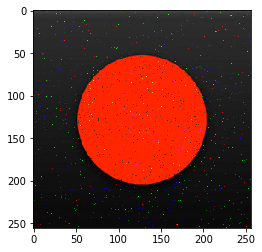

In [3]:
%%time
img, rcv_array = readOutput("output.data", np.array([67 + 0, 255], dtype = np.uint8), header, (256, 256))
plt.imshow(img)

In [4]:
check_original = orig[122:]

In [5]:
check_rcv = rcv_array[122:]

In [6]:
check_rcv

array([10, 10, 10, ..., 72, 72, 72], dtype=uint8)

In [7]:
1 - np.sum(np.equal(np.unpackbits(check_original), np.unpackbits(check_rcv))) / (8 * img.shape[0] * img.shape[1] * img.shape[2])

0.00570424397786462

In [8]:
np.argwhere(np.unpackbits(check_original) - np.unpackbits(check_rcv))

array([[    411],
       [    412],
       [   1907],
       ...,
       [1572477],
       [1572740],
       [1572741]])

In [ ]:
%%time
img = readOutput("xdB.data", np.array([67 + 0, 255], dtype = np.uint8), header, (256, 256))
plt.imshow(img)